# MMM com modelo da média móvel ponderada



média móvel Ponderada para prever o próximo resultado 

valores inicias na coluna previsto, como pesos (w). 

Pesos w3, ciclo última semana, ciclos de pagamentos.

Comportamento de vendas tende a ser explicado melhor por aquele período mais distante. 

Pesos em porcentagens


In [1]:
import pandas as pd

df_Base_fusca = pd.read_excel("08_MMM_TimeSeries_base.xlsx", sheet_name= "Base Fusca", skiprows=4, usecols=  ['Month', 'Facebook', 'Programática',
       'Youtube', 'UOL', 'Outros', 'Facebook.1', 'Programática.1', 'Youtube.1',
       'UOL.1', 'Outros.1'])
# renomear colunas
df_Base_fusca.columns= [ 'Month', 'Facebook_investimento', 'Programática_investimento', 'Youtube_investimento', 'UOL_investimento', 'Outros_investimento', 'Facebook_leads', 'Programática_leads', 'Youtube_leads',
       'UOL_leads', 'Outros_leads']

df_Base_fusca_altera = df_Base_fusca.copy() 

df_Base_fusca_altera.tail()

Month  Facebook_investimento  Programática_investimento  \
13 2017-02-01          208994.980000              491499.464400   
14 2017-03-01          328435.620000              618041.868600   
15 2017-04-01           53297.100000              254391.701100   
16 2017-05-02           79562.492043              217749.978223   
17 2017-06-03           74537.492546              209374.979060   

    Youtube_investimento  UOL_investimento  Outros_investimento  \
13           3222.930300      56715.758900        166924.346400   
14          33521.000317      45935.497133         58349.993950   
15          23625.100275      34653.107225         80334.221400   
16          19890.623011      30359.371964         71187.492881   
17          38315.621168      33709.371629         62812.493718   

    Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
13         2681.60              100.56          33.52    30.5032      505.8168  
14         1504.95               57.15          38.10    15.6210      289.1790  
15         2141.16               76.47         101.96    24.2155      205.1945  
16         2831.24               76.52          76.52    32.1384      809.5816  
17         1889.16              179.92         112.45    18.4418       49.0282

In [2]:
import numpy as np
from scipy import stats

# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Facebook_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Facebook_leads:")
display(outliers)

Outliers encontrados em Facebook_leads:


Month  Facebook_investimento  Programática_investimento  \
5  2016-06-01           189697.70886                391937.4150   
11 2016-12-01            55284.24552                194153.0051   

    Youtube_investimento  UOL_investimento  Outros_investimento  \
5           65453.548305      50559.926535           86226.2313   
11          23528.711635      19908.909845           36198.0179   

    Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
5          3871.92              297.84          99.28    41.2012      653.7588  
11          900.00               17.00          17.00     5.0000        4.0000

In [3]:
# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Programática_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Programática_leads:")
display(outliers)

Outliers encontrados em Programática_leads:


Month  Facebook_investimento  Programática_investimento  \
3 2016-04-01           81396.278302                347615.5767   
5 2016-06-01          189697.708860                391937.4150   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
3         107648.585849      63146.828750           81791.9004   
5          65453.548305      50559.926535           86226.2313   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
3         2468.20              282.08          35.26    32.0866      708.3734  
5         3871.92              297.84          99.28    41.2012      653.7588

# Analise estatística correta - zscore normalizado

In [4]:
import numpy as np
import pandas as pd
from scipy import stats


lista = ['Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads', 'Outros_leads']

datas_coletadas =[]
for col in lista:
    # Calcular z-score
    z_scores = stats.zscore(df_Base_fusca_altera[f'{col}'])
    
    # Encontrar índices de outliers
    outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.3].reset_index(drop=True)
    
    print(f"Outliers encontrados em {col}:")
    if not outliers.empty:
        display(outliers)
        for i, data in enumerate(outliers['Month']):
            print(i, data)
            datas_coletadas.append(data)

Outliers encontrados em Facebook_leads:


Month  Facebook_investimento  Programática_investimento  \
0 2016-06-01           189697.70886                391937.4150   
1 2016-12-01            55284.24552                194153.0051   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
0          65453.548305      50559.926535           86226.2313   
1          23528.711635      19908.909845           36198.0179   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
0         3871.92              297.84          99.28    41.2012      653.7588  
1          900.00               17.00          17.00     5.0000        4.0000

0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Programática_leads:


Month  Facebook_investimento  Programática_investimento  \
0 2016-04-01           81396.278302                347615.5767   
1 2016-05-01          145988.500300                330060.9572   
2 2016-06-01          189697.708860                391937.4150   
3 2016-12-01           55284.245520                194153.0051   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
0         107648.585849      63146.828750           81791.9004   
1          10578.876833      52894.384167           95209.8915   
2          65453.548305      50559.926535           86226.2313   
3          23528.711635      19908.909845           36198.0179   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
0         2468.20              282.08          35.26    32.0866      708.3734  
1         2874.40              251.51          35.93    31.6184      399.5416  
2         3871.92              297.84          99.28    41.2012      653.7588  
3          900.00               17.00          17.00     5.0000        4.0000

0 2016-04-01 00:00:00
1 2016-05-01 00:00:00
2 2016-06-01 00:00:00
3 2016-12-01 00:00:00
Outliers encontrados em Youtube_leads:


Month  Facebook_investimento  Programática_investimento  \
0 2016-01-01           60473.873061               143334.30770   
1 2016-10-01          113164.169100               351404.52510   
2 2017-06-03           74537.492546               209374.97906   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
0          29416.657409      22211.303080         15005.948750   
1          25167.000650      43677.398600         62187.796550   
2          38315.621168      33709.371629         62812.493718   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
0         1760.99              182.96         114.35    19.8969      208.8031  
1         2053.28              125.20         125.20    21.0336      179.2864  
2         1889.16              179.92         112.45    18.4418       49.0282

0 2016-01-01 00:00:00
1 2016-10-01 00:00:00
2 2017-06-03 00:00:00
Outliers encontrados em UOL_leads:


Month  Facebook_investimento  Programática_investimento  \
0 2016-06-01           189697.70886                391937.4150   
1 2016-12-01            55284.24552                194153.0051   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
0          65453.548305      50559.926535           86226.2313   
1          23528.711635      19908.909845           36198.0179   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
0         3871.92              297.84          99.28    41.2012      653.7588  
1          900.00               17.00          17.00     5.0000        4.0000

0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Outros_leads:


Month  Facebook_investimento  Programática_investimento  \
0 2016-04-01           81396.278302              347615.576700   
1 2016-12-01           55284.245520              194153.005100   
2 2017-05-02           79562.492043              217749.978223   
3 2017-06-03           74537.492546              209374.979060   

   Youtube_investimento  UOL_investimento  Outros_investimento  \
0         107648.585849      63146.828750         81791.900400   
1          23528.711635      19908.909845         36198.017900   
2          19890.623011      30359.371964         71187.492881   
3          38315.621168      33709.371629         62812.493718   

   Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  Outros_leads  
0         2468.20              282.08          35.26    32.0866      708.3734  
1          900.00               17.00          17.00     5.0000        4.0000  
2         2831.24               76.52          76.52    32.1384      809.5816  
3         1889.16              179.92         112.45    18.4418       49.0282

0 2016-04-01 00:00:00
1 2016-12-01 00:00:00
2 2017-05-02 00:00:00
3 2017-06-03 00:00:00


In [5]:
from collections import Counter
contagem = Counter(datas_coletadas)
print(contagem)

Counter({Timestamp('2016-12-01 00:00:00'): 4, Timestamp('2016-06-01 00:00:00'): 3, Timestamp('2016-04-01 00:00:00'): 2, Timestamp('2017-06-03 00:00:00'): 2, Timestamp('2016-05-01 00:00:00'): 1, Timestamp('2016-01-01 00:00:00'): 1, Timestamp('2016-10-01 00:00:00'): 1, Timestamp('2017-05-02 00:00:00'): 1})


In [6]:
data_contagem = pd.DataFrame.from_dict(contagem, orient='index', columns=['Frequência'])
data_contagem = data_contagem.sort_values('Frequência', ascending = False)
data_contagem

Frequência
2016-12-01           4
2016-06-01           3
2016-04-01           2
2017-06-03           2
2016-05-01           1
2016-01-01           1
2016-10-01           1
2017-05-02           1

In [7]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] 

11    900.0
Name: Facebook_leads, dtype: float64

In [8]:

for col in lista:
    # Soma de 13 dias (6 antes, 1 atual, 6 depois), centralizada
    soma_13 = df_Base_fusca_altera[col].rolling(window=13, center=True).sum()
    
    # Subtrai o valor atual para excluir o dia central
    soma_sem_central = soma_13 - df_Base_fusca_altera[col]
    
    # Calcula a média de 12 dias (6 antes + 6 depois, sem o atual)
    df_Base_fusca_altera[f'{col}media_6_antes_6_depois'] = soma_sem_central / 12

In [9]:
df_Base_fusca_altera

Month  Facebook_investimento  Programática_investimento  \
0  2016-01-01           60473.873061              143334.307700   
1  2016-02-01           52028.197184              122356.197500   
2  2016-03-01          228511.969582              377200.055000   
3  2016-04-01           81396.278302              347615.576700   
4  2016-05-01          145988.500300              330060.957200   
5  2016-06-01          189697.708860              391937.415000   
6  2016-07-01          142408.233800              374758.510000   
7  2016-08-01          117147.529820              355391.382600   
8  2016-09-01          190300.119460              440363.912800   
9  2016-10-01          113164.169100              351404.525100   
10 2016-11-01           61327.000380              186048.203400   
11 2016-12-01           55284.245520              194153.005100   
12 2017-01-01          171074.920000              436081.538100   
13 2017-02-01          208994.980000              491499.464400   
14 2017-03-01          328435.620000              618041.868600   
15 2017-04-01           53297.100000              254391.701100   
16 2017-05-02           79562.492043              217749.978223   
17 2017-06-03           74537.492546              209374.979060   

    Youtube_investimento  UOL_investimento  Outros_investimento  \
0           29416.657409      22211.303080         15005.948750   
1           12345.368987      14119.088829         30011.897500   
2           82119.441529      49562.695139         17005.948750   
3          107648.585849      63146.828750         81791.900400   
4           10578.876833      52894.384167         95209.891500   
5           65453.548305      50559.926535         86226.231300   
6           96844.813750      58087.569050         77417.893400   
7           38171.667020      61864.425860         85557.184700   
8            9436.369560      51900.032580         94363.695600   
9           25167.000650      43677.398600         62187.796550   
10          23428.292280      32386.168740         41344.045200   
11          23528.711635      19908.909845         36198.017900   
12          41918.620925      39474.717975         76505.533000   
13           3222.930300      56715.758900        166924.346400   
14          33521.000317      45935.497133         58349.993950   
15          23625.100275      34653.107225         80334.221400   
16          19890.623011      30359.371964         71187.492881   
17          38315.621168      33709.371629         62812.493718   

    Facebook_leads  Programática_leads  Youtube_leads  UOL_leads  \
0          1760.99              182.96         114.35    19.8969   
1          1908.95              209.20          26.15    25.1040   
2          1791.33               50.46         100.92    23.4639   
3          2468.20              282.08          35.26    32.0866   
4          2874.40              251.51          35.93    31.6184   
5          3871.92              297.84          99.28    41.2012   
6          1508.00               40.20          40.20    16.6830   
7          1965.60              176.40          25.20    20.9160   
8          1593.90              136.62          22.77    17.0775   
9          2053.28              125.20         125.20    21.0336   
10         1315.44               81.20          81.20    14.4536   
11          900.00               17.00          17.00     5.0000   
12         1962.72              136.30          27.26    25.3518   
13         2681.60              100.56          33.52    30.5032   
14         1504.95               57.15          38.10    15.6210   
15         2141.16               76.47         101.96    24.2155   
16         2831.24               76.52          76.52    32.1384   
17         1889.16              179.92         112.45    18.4418   

    Outros_leads  Facebook_leadsmedia_6_antes_6_depois  \
0       208.8031                                   NaN   
1       445.5960                                   

In [10]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leadsmedia_6_antes_6_depois'] 


# corrigido os dados do dia 12/2016

In [11]:
df_Base_fusca_altera2= df_Base_fusca_altera[['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads']]

In [12]:
# Derrete o DataFrame mantendo a coluna Month
df_long = df_Base_fusca_altera2.melt(id_vars='Month', var_name='name', value_name='valor')

# Separa a coluna 'name' em nameplate e tipo (investimentos/leads)
df_long[['nameplate', 'tipo']] = df_long['name'].str.split('_', expand=True)

# Remove a coluna antiga
df_long = df_long.drop(columns='name')
df_long

Month          valor nameplate          tipo
0   2016-01-01   60473.873061  Facebook  investimento
1   2016-02-01   52028.197184  Facebook  investimento
2   2016-03-01  228511.969582  Facebook  investimento
3   2016-04-01   81396.278302  Facebook  investimento
4   2016-05-01  145988.500300  Facebook  investimento
..         ...            ...       ...           ...
175 2017-02-01     505.816800    Outros         leads
176 2017-03-01     289.179000    Outros         leads
177 2017-04-01     205.194500    Outros         leads
178 2017-05-02     809.581600    Outros         leads
179 2017-06-03      49.028200    Outros         leads

[180 rows x 4 columns]

In [13]:
# Pivot para ter colunas separadas de investimentos e leads
df_pivot = df_long.pivot_table(
    index=['Month', 'nameplate'],
    columns='tipo',
    values='valor',
    aggfunc='first'  # ou 'sum', se quiser agregar
).reset_index()
df_pivot

tipo      Month     nameplate   investimento      leads
0    2016-01-01      Facebook   60473.873061  1760.9900
1    2016-01-01        Outros   15005.948750   208.8031
2    2016-01-01  Programática  143334.307700   182.9600
3    2016-01-01           UOL   22211.303080    19.8969
4    2016-01-01       Youtube   29416.657409   114.3500
..          ...           ...            ...        ...
85   2017-06-03      Facebook   74537.492546  1889.1600
86   2017-06-03        Outros   62812.493718    49.0282
87   2017-06-03  Programática  209374.979060   179.9200
88   2017-06-03           UOL   33709.371629    18.4418
89   2017-06-03       Youtube   38315.621168   112.4500

[90 rows x 4 columns]

# usar o df_final

In [14]:
 #Resultado final  => coreto 
df_final = df_pivot[['Month', 'nameplate', 'investimento', 'leads']]
df_final

tipo      Month     nameplate   investimento      leads
0    2016-01-01      Facebook   60473.873061  1760.9900
1    2016-01-01        Outros   15005.948750   208.8031
2    2016-01-01  Programática  143334.307700   182.9600
3    2016-01-01           UOL   22211.303080    19.8969
4    2016-01-01       Youtube   29416.657409   114.3500
..          ...           ...            ...        ...
85   2017-06-03      Facebook   74537.492546  1889.1600
86   2017-06-03        Outros   62812.493718    49.0282
87   2017-06-03  Programática  209374.979060   179.9200
88   2017-06-03           UOL   33709.371629    18.4418
89   2017-06-03       Youtube   38315.621168   112.4500

[90 rows x 4 columns]

# calcular de forma correta o ROI

In [15]:
df_group_geral = df_final.groupby(['Month']).agg({'investimento':'sum', 'leads':'sum'}).reset_index()
df_group_geral['ROI(%)'] = (df_group_geral['leads']/df_group_geral['investimento'])*100
df_group_geral 

tipo      Month  investimento        leads    ROI(%)
0    2016-01-01  2.704421e+05  2287.000000  0.845652
1    2016-02-01  2.308607e+05  2615.000000  1.132717
2    2016-03-01  7.544001e+05  2523.000000  0.334438
3    2016-04-01  6.815992e+05  3526.000000  0.517313
4    2016-05-01  6.347326e+05  3593.000000  0.566065
5    2016-06-01  7.838748e+05  4964.000000  0.633264
6    2016-07-01  7.495170e+05  2010.000000  0.268173
7    2016-08-01  6.581322e+05  2520.000000  0.382902
8    2016-09-01  7.863641e+05  2277.000000  0.289561
9    2016-10-01  5.956009e+05  2504.000000  0.420416
10   2016-11-01  3.445337e+05  1624.000000  0.471362
11   2016-12-01  3.290729e+05  2708.833333  0.823171
12   2017-01-01  7.650553e+05  2726.000000  0.356314
13   2017-02-01  9.273575e+05  3352.000000  0.361457
14   2017-03-01  1.084284e+06  1905.000000  0.175692
15   2017-04-01  4.463012e+05  2549.000000  0.571139
16   2017-05-02  4.187500e+05  3826.000000  0.913672
17   2017-06-03  4.187500e+05  2249.000000  0.537075

# 3.29) Média Móvel Ponderada

In [16]:
df_MMPonderada = df_group_geral.copy()

df_MMPonderada.loc[18,'Month'] = '2017-07-01'
df_MMPonderada.loc[19,'Month'] = '2017-08-01'

In [17]:
df_MMPonderada

tipo      Month  investimento        leads    ROI(%)
0    2016-01-01  2.704421e+05  2287.000000  0.845652
1    2016-02-01  2.308607e+05  2615.000000  1.132717
2    2016-03-01  7.544001e+05  2523.000000  0.334438
3    2016-04-01  6.815992e+05  3526.000000  0.517313
4    2016-05-01  6.347326e+05  3593.000000  0.566065
5    2016-06-01  7.838748e+05  4964.000000  0.633264
6    2016-07-01  7.495170e+05  2010.000000  0.268173
7    2016-08-01  6.581322e+05  2520.000000  0.382902
8    2016-09-01  7.863641e+05  2277.000000  0.289561
9    2016-10-01  5.956009e+05  2504.000000  0.420416
10   2016-11-01  3.445337e+05  1624.000000  0.471362
11   2016-12-01  3.290729e+05  2708.833333  0.823171
12   2017-01-01  7.650553e+05  2726.000000  0.356314
13   2017-02-01  9.273575e+05  3352.000000  0.361457
14   2017-03-01  1.084284e+06  1905.000000  0.175692
15   2017-04-01  4.463012e+05  2549.000000  0.571139
16   2017-05-02  4.187500e+05  3826.000000  0.913672
17   2017-06-03  4.187500e+05  2249.000000  0.537075
18   2017-07-01           NaN          NaN       NaN
19   2017-08-01           NaN          NaN       NaN

# ROI previsto, com base nos pesos 

In [18]:
df_MMPonderada.loc[df_MMPonderada['Month'] == '2017-08-01', 'ROI(%)']=0.0
df_MMPonderada.loc[df_MMPonderada['Month'] == '2017-07-01', 'ROI(%)']=0.0

Análise de abril de 2016 => previsão:
w1 valor mais próximo (ROI de mar/2016) representa a porcentagem w1, w2 valor de fevereiro/16 que representa em porcentagem, w3 valor de janeiro/2016 representado em  porcentagem. w3 valor mais distante do previsto.

Méida de 4 semanas, apesar de 3 dias anteriores. 

na linha 4['ROI% PREVISTO'] = linha3['ROI(%)']*w1 + linha2['ROI(%)']*w2 + linha3['ROI(%)']*w3

In [19]:
df_copy = df_MMPonderada.copy()

In [20]:
# pesos
w1, w2, w3 = 0.3, 0.2, 0.5

pesos_print = f"""Pesos

w1= {w1},
w2= {w2},
w3= {w3},

soma dos pesos {w1+w2+w3}
"""
print(pesos_print)

# aplica os pesos nas 3 linhas anteriores
def calcular_roi_previsto(series):

    ROI_Previsto = series.shift(1) * w1 + series.shift(2) * w2 + series.shift(3) * w3
    #print(series.shift(1).values)
    #print(ROI_Previsto)
   
    return ROI_Previsto

df_MMPonderada['ROI previsto%']  = calcular_roi_previsto(df_MMPonderada['ROI(%)'])

Pesos

w1= 0.3,
w2= 0.2,
w3= 0.5,

soma dos pesos 1.0



In [21]:
df_MMPonderada

tipo      Month  investimento        leads    ROI(%)  ROI previsto%
0    2016-01-01  2.704421e+05  2287.000000  0.845652            NaN
1    2016-02-01  2.308607e+05  2615.000000  1.132717            NaN
2    2016-03-01  7.544001e+05  2523.000000  0.334438            NaN
3    2016-04-01  6.815992e+05  3526.000000  0.517313       0.749701
4    2016-05-01  6.347326e+05  3593.000000  0.566065       0.788440
5    2016-06-01  7.838748e+05  4964.000000  0.633264       0.440501
6    2016-07-01  7.495170e+05  2010.000000  0.268173       0.561849
7    2016-08-01  6.581322e+05  2520.000000  0.382902       0.490137
8    2016-09-01  7.863641e+05  2277.000000  0.289561       0.485137
9    2016-10-01  5.956009e+05  2504.000000  0.420416       0.297535
10   2016-11-01  3.445337e+05  1624.000000  0.471362       0.375488
11   2016-12-01  3.290729e+05  2708.833333  0.823171       0.370272
12   2017-01-01  7.650553e+05  2726.000000  0.356314       0.551432
13   2017-02-01  9.273575e+05  3352.000000  0.361457       0.507209
14   2017-03-01  1.084284e+06  1905.000000  0.175692       0.591286
15   2017-04-01  4.463012e+05  2549.000000  0.571139       0.303156
16   2017-05-02  4.187500e+05  3826.000000  0.913672       0.387209
17   2017-06-03  4.187500e+05  2249.000000  0.537075       0.476175
18   2017-07-01           NaN          NaN  0.000000       0.629426
19   2017-08-01           NaN          NaN  0.000000       0.564251

series temporais e programação não linear, matemática aplicada. 

In [22]:
for i in range(3, len(df_MMPonderada)):
    r1 = df_MMPonderada.loc[i-1, 'ROI(%)']
    r2 = df_MMPonderada.loc[i-2, 'ROI(%)']
    r3 = df_MMPonderada.loc[i-3, 'ROI(%)']
    previsto = r1*w1 + r2*w2 + r3*w3
    print(f'{r1:.2f}*{w1} + {r2:.2f}*{w2} + {r3:.2f}*{w3} = {previsto}')
    df_MMPonderada.loc[i, 'ROI previsto(%)'] = previsto

0.33*0.3 + 1.13*0.2 + 0.85*0.5 = 0.7497010599492524
0.52*0.3 + 0.33*0.2 + 1.13*0.5 = 0.788440158893312
0.57*0.3 + 0.52*0.2 + 0.33*0.5 = 0.440501065124605
0.63*0.3 + 0.57*0.2 + 0.52*0.5 = 0.5618487559341319
0.27*0.3 + 0.63*0.2 + 0.57*0.5 = 0.49013724977497924
0.38*0.3 + 0.27*0.2 + 0.63*0.5 = 0.4851372638852463
0.29*0.3 + 0.38*0.2 + 0.27*0.5 = 0.2975348615364578
0.42*0.3 + 0.29*0.2 + 0.38*0.5 = 0.3754877298146452
0.47*0.3 + 0.42*0.2 + 0.29*0.5 = 0.37027192179174906
0.82*0.3 + 0.47*0.2 + 0.42*0.5 = 0.551431588976708
0.36*0.3 + 0.82*0.2 + 0.47*0.5 = 0.5072093309658501
0.36*0.3 + 0.36*0.2 + 0.82*0.5 = 0.5912855788370652
0.18*0.3 + 0.36*0.2 + 0.36*0.5 = 0.3031560750763461
0.57*0.3 + 0.18*0.2 + 0.36*0.5 = 0.38720864989254145
0.91*0.3 + 0.57*0.2 + 0.18*0.5 = 0.4761752931409069
0.54*0.3 + 0.91*0.2 + 0.57*0.5 = 0.6294262080096775
0.00*0.3 + 0.54*0.2 + 0.91*0.5 = 0.564250802699294


# tabela ROI real e previsto em % 

In [23]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


def grafico_comparativo(df):
    fig, x = plt.subplots(figsize=(12, 6))
    
    # Formatando o eixo X
    x.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostra todos os meses
    x.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formato '01/2016'
        
        
    x.plot(df['Month'], df['ROI(%)'], color='green', marker='o', linewidth=2, label='ROI (%)')
    x.plot(df['Month'], df['ROI previsto%'], color='orange', marker='*', linewidth=2, linestyle='--', label='Previsto ROI (%)')
    
    x.set_ylabel('ROI (%)', color='green')
    x.tick_params(axis='y', labelcolor='green')
        
    # Títulos e grid
    plt.title(f'Forecast and Real ROI%')
    fig.autofmt_xdate()
    x.grid(True,  linestyle='--', alpha=0.5)
    
    plt.xlabel("Mês")
    plt.ylabel("ROI (%)")
    # Legenda combinada
    lines_1, labels_1 = x.get_legend_handles_labels()
    x.legend(lines_1 , labels_1 , loc='upper right')   
    plt.tight_layout()
    #plt.savefig(f'roi2.png', dpi=300, bbox_inches='tight')
    plt.show()

In [24]:
def calculo_erros(df):
    df['Erro Absoluto(%)'] = abs(df['ROI(%)'] - df['ROI previsto%'])
    df['Erro Absoluto'] = df['Erro Absoluto(%)']/100
    df['Erro Quadrático'] = df['Erro Absoluto'] **2

    media_erro_abs = df['Erro Absoluto'][3:19].mean()
    # erro da média
    media = f"""
    Média (Erro ABS) = {df['Erro Absoluto'][3:19].mean():.7f}
    
    Média (Erro²) = {df['Erro Quadrático'][3:19].mean():.7f}
    """
    print(media)
    
    # Cálculo da previsão: Realizado, Estimado e sua variação
    realizado = df.loc[df['Month']=='2017-06-03', 'ROI(%)'].values[0]
    previsto = df.loc[df['Month']=='2017-06-03', 'ROI previsto%'].values[0]
    pp = previsto - realizado
    previsao = f"""Previsão 
    
    Realizado (junho de 2017) = {df.loc[df['Month']=='2017-06-03', 'ROI(%)'].values[0]:.2f} %
    
    Estimado (Previsto em junho de 2017) = {df.loc[df['Month']=='2017-06-03', 'ROI previsto%'].values[0]:.2f} %
    
    A variação foi de {abs(pp):.2f} pontos percentuais.    
    """
    print(previsao)

    print('gráfico comparativo')
    grafico_comparativo(df)

    realizado_ROI_maio17 = df.loc[df['Month']== '2017-05-02','ROI(%)'].values[0]
    realizado_ROI_junho17 = df.loc[df['Month']== '2017-06-03','ROI(%)'].values[0]    
    previsto_ROI_maio17 = df.loc[df['Month']== '2017-05-02','ROI previsto%'].values[0]
    previsto_ROI_junho17 = df.loc[df['Month']== '2017-06-03','ROI previsto%'].values[0]
    
    # no excel =ABS(ARRED((R22-S22)*100;2))&" p.p"
    #pontos_percentuaismaio17 = abs(round((realizado_ROI_maio17 - previsto_ROI_maio17) * 100, 2))
    #pontos_percentuaisjunho17 = abs(round((realizado_ROI_junho17-previsto_ROI_junho17) * 100, 2))
    
    pontos_percentuais_MMP_maio17 = abs(round((realizado_ROI_maio17 - previsto_ROI_maio17) , 2))
    pontos_percentuais_MMP_junho17 = abs(round((realizado_ROI_junho17-previsto_ROI_junho17) , 2))

    
    previsao = f"""Previsão: 
    
    Realizado ROI (maio de 2017) = {realizado_ROI_maio17:.2f} %
    Realizado ROI (junho de 2017) = {realizado_ROI_junho17:.2f} % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de {pontos_percentuais_MMP_maio17} p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de {pontos_percentuais_MMP_junho17} p.p    
    """
    print(previsao)

    return df


    Média (Erro ABS) = 0.0025981
    
    Média (Erro²) = 0.0000093
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.48 %
    
    A variação foi de 0.06 pontos percentuais.    
    
gráfico comparativo


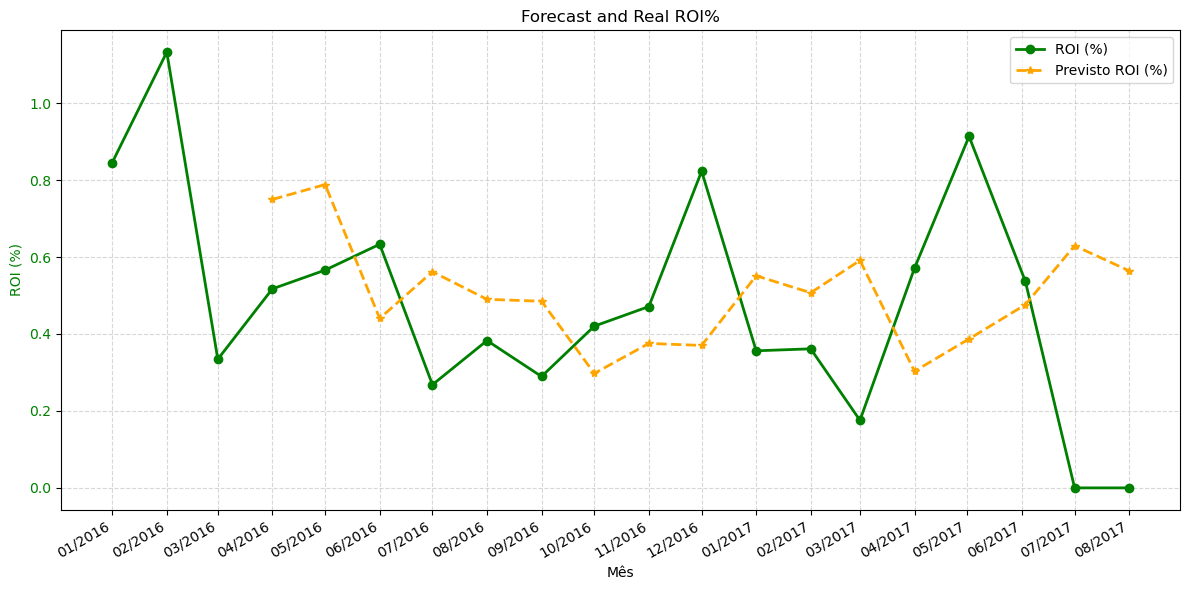

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.53 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.06 p.p    
    


tipo      Month  investimento        leads    ROI(%)  ROI previsto%  \
0    2016-01-01  2.704421e+05  2287.000000  0.845652            NaN   
1    2016-02-01  2.308607e+05  2615.000000  1.132717            NaN   
2    2016-03-01  7.544001e+05  2523.000000  0.334438            NaN   
3    2016-04-01  6.815992e+05  3526.000000  0.517313       0.749701   
4    2016-05-01  6.347326e+05  3593.000000  0.566065       0.788440   
5    2016-06-01  7.838748e+05  4964.000000  0.633264       0.440501   
6    2016-07-01  7.495170e+05  2010.000000  0.268173       0.561849   
7    2016-08-01  6.581322e+05  2520.000000  0.382902       0.490137   
8    2016-09-01  7.863641e+05  2277.000000  0.289561       0.485137   
9    2016-10-01  5.956009e+05  2504.000000  0.420416       0.297535   
10   2016-11-01  3.445337e+05  1624.000000  0.471362       0.375488   
11   2016-12-01  3.290729e+05  2708.833333  0.823171       0.370272   
12   2017-01-01  7.650553e+05  2726.000000  0.356314       0.551432   
13   2017-02-01  9.273575e+05  3352.000000  0.361457       0.507209   
14   2017-03-01  1.084284e+06  1905.000000  0.175692       0.591286   
15   2017-04-01  4.463012e+05  2549.000000  0.571139       0.303156   
16   2017-05-02  4.187500e+05  3826.000000  0.913672       0.387209   
17   2017-06-03  4.187500e+05  2249.000000  0.537075       0.476175   
18   2017-07-01           NaN          NaN  0.000000       0.629426   
19   2017-08-01           NaN          NaN  0.000000       0.564251   

tipo  ROI previsto(%)  Erro Absoluto(%)  Erro Absoluto  Erro Quadrático  
0                 NaN               NaN            NaN              NaN  
1                 NaN               NaN            NaN              NaN  
2                 NaN               NaN            NaN              NaN  
3            0.749701          0.232388       0.002324     5.400429e-06  
4            0.788440          0.222375       0.002224     4.945065e-06  
5            0.440501          0.192763       0.001928     3.715769e-06  
6            0.561849          0.293676       0.002937     8.624563e-06  
7            0.490137          0.107235       0.001072     1.149944e-06  
8            0.485137          0.195577       0.001956     3.825027e-06  
9            0.297535          0.122881       0.001229     1.509971e-06  
10           0.375488          0.095874       0.000959     9.191821e-07  
11           0.370272          0.452899       0.004529     2.051178e-05  
12           0.551432          0.195117       0.001951     3.807084e-06  
13           0.507209          0.145752       0.001458     2.124370e-06  
14           0.591286          0.415594       0.004156     1.727180e-05  
15           0.303156          0.267983       0.002680     7.181480e-06  
16           0.387209          0.526463       0.005265     2.771634e-05  
17           0.476175          0.060899       0.000609     3.708735e-07  
18           0.629426          0.629426       0.006294     3.961774e-05  
19           0.564251          0.564251       0.005643     3.183790e-05

In [25]:
df_MMPonderada = calculo_erros(df_MMPonderada)
df_MMPonderada

O valor da regressão de maio e junho de 2017 está em 3-2-Modelo_media_movel_simples.ipynb

Regressão:

A variação em maio de 2017 foi de 0.08 p.p

A variação em junho de 2017 foi de 0.06 p.p


# base final -> Do excel

In [26]:
# pesos
w1, w2, w3 = 0.73, 0.15,0.12

pesos_print = f"""Pesos

w1= {w1},
w2= {w2},
w3= {w3},

soma dos pesos {w1+w2+w3}
"""
print(pesos_print)

# aplica os pesos nas 3 linhas anteriores
def calcular_roi_previsto_0(series):

    ROI_Previsto = series.shift(1) * w1 + series.shift(2) * w2 + series.shift(3) * w3
    print(series.shift(1).values)
    print(ROI_Previsto)
   
    return ROI_Previsto

df_MMPonderada['ROI previsto%']  = calcular_roi_previsto_0(df_MMPonderada['ROI(%)'])

for i in range(3, len(df_MMPonderada)):
    r1 = df_MMPonderada.loc[i-1, 'ROI(%)']
    r2 = df_MMPonderada.loc[i-2, 'ROI(%)']
    r3 = df_MMPonderada.loc[i-3, 'ROI(%)']
    previsto = r1*w1 + r2*w2 + r3*w3
    print(f'{r1:.2f}*{w1} + {r2:.2f}*{w2} + {r3:.2f}*{w3} = {previsto}')
    df_MMPonderada.loc[i, 'ROI previsto(%)'] = previsto



Pesos

w1= 0.73,
w2= 0.15,
w3= 0.12,

soma dos pesos 1.0

[       nan 0.84565239 1.13271745 0.33443792 0.51731284 0.56606513
 0.63326437 0.2681727  0.3829018  0.28956051 0.42041576 0.47136171
 0.82317122 0.3563141  0.36145716 0.17569198 0.57113891 0.91367173
 0.53707468 0.        ]
0          NaN
1          NaN
2          NaN
3     0.515526
4     0.563730
5     0.530957
6     0.609270
7     0.358684
8     0.395736
9     0.300995
10    0.396286
11    0.441904
12    0.722069
13    0.440148
14    0.416091
15    0.225231
16    0.486660
17    0.773734
18    0.597652
19    0.190202
Name: ROI(%), dtype: float64
0.33*0.73 + 1.13*0.15 + 0.85*0.12 = 0.5155255824563715
0.52*0.73 + 0.33*0.15 + 1.13*0.12 = 0.5637301519106233
0.57*0.73 + 0.52*0.15 + 0.33*0.12 = 0.5309570231951946
0.63*0.73 + 0.57*0.15 + 0.52*0.12 = 0.6092703002448464
0.27*0.73 + 0.63*0.15 + 0.57*0.12 = 0.3586835396474689
0.38*0.73 + 0.27*0.15 + 0.63*0.12 = 0.39573594254218514
0.29*0.73 + 0.38*0.15 + 0.27*0.12 = 0.30099516715075736
0


    Média (Erro ABS) = 0.0021536
    
    Média (Erro²) = 0.0000076
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.77 %
    
    A variação foi de 0.24 pontos percentuais.    
    
gráfico comparativo


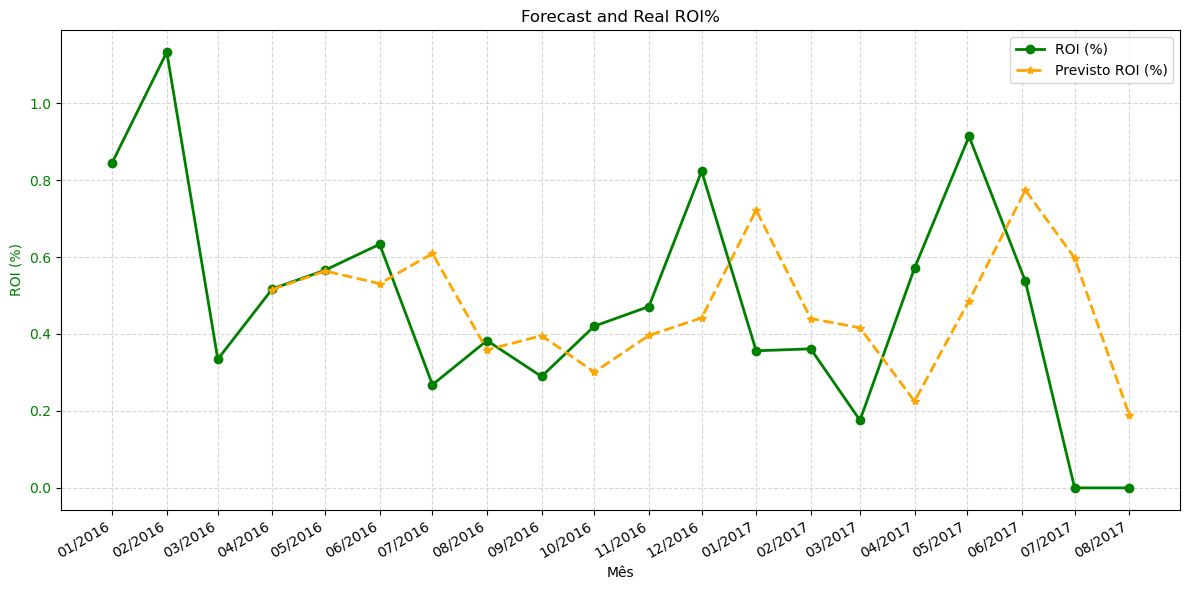

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.43 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.24 p.p    
    


tipo      Month  investimento        leads    ROI(%)  ROI previsto%  \
0    2016-01-01  2.704421e+05  2287.000000  0.845652            NaN   
1    2016-02-01  2.308607e+05  2615.000000  1.132717            NaN   
2    2016-03-01  7.544001e+05  2523.000000  0.334438            NaN   
3    2016-04-01  6.815992e+05  3526.000000  0.517313       0.515526   
4    2016-05-01  6.347326e+05  3593.000000  0.566065       0.563730   
5    2016-06-01  7.838748e+05  4964.000000  0.633264       0.530957   
6    2016-07-01  7.495170e+05  2010.000000  0.268173       0.609270   
7    2016-08-01  6.581322e+05  2520.000000  0.382902       0.358684   
8    2016-09-01  7.863641e+05  2277.000000  0.289561       0.395736   
9    2016-10-01  5.956009e+05  2504.000000  0.420416       0.300995   
10   2016-11-01  3.445337e+05  1624.000000  0.471362       0.396286   
11   2016-12-01  3.290729e+05  2708.833333  0.823171       0.441904   
12   2017-01-01  7.650553e+05  2726.000000  0.356314       0.722069   
13   2017-02-01  9.273575e+05  3352.000000  0.361457       0.440148   
14   2017-03-01  1.084284e+06  1905.000000  0.175692       0.416091   
15   2017-04-01  4.463012e+05  2549.000000  0.571139       0.225231   
16   2017-05-02  4.187500e+05  3826.000000  0.913672       0.486660   
17   2017-06-03  4.187500e+05  2249.000000  0.537075       0.773734   
18   2017-07-01           NaN          NaN  0.000000       0.597652   
19   2017-08-01           NaN          NaN  0.000000       0.190202   

tipo  ROI previsto(%)  Erro Absoluto(%)  Erro Absoluto  Erro Quadrático  
0                 NaN               NaN            NaN              NaN  
1                 NaN               NaN            NaN              NaN  
2                 NaN               NaN            NaN              NaN  
3            0.515526          0.001787       0.000018     3.194277e-10  
4            0.563730          0.002335       0.000023     5.452142e-10  
5            0.530957          0.102307       0.001023     1.046679e-06  
6            0.609270          0.341098       0.003411     1.163476e-05  
7            0.358684          0.024218       0.000242     5.865241e-08  
8            0.395736          0.106175       0.001062     1.127322e-06  
9            0.300995          0.119421       0.001194     1.426128e-06  
10           0.396286          0.075076       0.000751     5.636393e-07  
11           0.441904          0.381268       0.003813     1.453649e-05  
12           0.722069          0.365755       0.003658     1.337768e-05  
13           0.440148          0.078691       0.000787     6.192308e-07  
14           0.416091          0.240399       0.002404     5.779187e-06  
15           0.225231          0.345908       0.003459     1.196520e-05  
16           0.486660          0.427012       0.004270     1.823390e-05  
17           0.773734          0.236660       0.002367     5.600775e-06  
18           0.597652          0.597652       0.005977     3.571878e-05  
19           0.190202          0.190202       0.001902     3.617673e-06

In [27]:
df_MMPonderada = calculo_erros(df_MMPonderada)
display(df_MMPonderada)

# Parametrização ideal ou solver 

Quero usar o critério de escolhas dos números w1,w2 e w3 semelhantes ao solver no excel, só que no python


com o objetivo de minimizar o erro, que é obtido e nomeado como media_erro_abs


e as restrições são quando as somas do w1 +w2+w3 não podem ficar acima de 1, nem abaixo ou igual a 0 e deve ser sempre igual a 1.


Selecionar método de solução não linear.

In [28]:
df_MMPonderada

tipo      Month  investimento        leads    ROI(%)  ROI previsto%  \
0    2016-01-01  2.704421e+05  2287.000000  0.845652            NaN   
1    2016-02-01  2.308607e+05  2615.000000  1.132717            NaN   
2    2016-03-01  7.544001e+05  2523.000000  0.334438            NaN   
3    2016-04-01  6.815992e+05  3526.000000  0.517313       0.515526   
4    2016-05-01  6.347326e+05  3593.000000  0.566065       0.563730   
5    2016-06-01  7.838748e+05  4964.000000  0.633264       0.530957   
6    2016-07-01  7.495170e+05  2010.000000  0.268173       0.609270   
7    2016-08-01  6.581322e+05  2520.000000  0.382902       0.358684   
8    2016-09-01  7.863641e+05  2277.000000  0.289561       0.395736   
9    2016-10-01  5.956009e+05  2504.000000  0.420416       0.300995   
10   2016-11-01  3.445337e+05  1624.000000  0.471362       0.396286   
11   2016-12-01  3.290729e+05  2708.833333  0.823171       0.441904   
12   2017-01-01  7.650553e+05  2726.000000  0.356314       0.722069   
13   2017-02-01  9.273575e+05  3352.000000  0.361457       0.440148   
14   2017-03-01  1.084284e+06  1905.000000  0.175692       0.416091   
15   2017-04-01  4.463012e+05  2549.000000  0.571139       0.225231   
16   2017-05-02  4.187500e+05  3826.000000  0.913672       0.486660   
17   2017-06-03  4.187500e+05  2249.000000  0.537075       0.773734   
18   2017-07-01           NaN          NaN  0.000000       0.597652   
19   2017-08-01           NaN          NaN  0.000000       0.190202   

tipo  ROI previsto(%)  Erro Absoluto(%)  Erro Absoluto  Erro Quadrático  
0                 NaN               NaN            NaN              NaN  
1                 NaN               NaN            NaN              NaN  
2                 NaN               NaN            NaN              NaN  
3            0.515526          0.001787       0.000018     3.194277e-10  
4            0.563730          0.002335       0.000023     5.452142e-10  
5            0.530957          0.102307       0.001023     1.046679e-06  
6            0.609270          0.341098       0.003411     1.163476e-05  
7            0.358684          0.024218       0.000242     5.865241e-08  
8            0.395736          0.106175       0.001062     1.127322e-06  
9            0.300995          0.119421       0.001194     1.426128e-06  
10           0.396286          0.075076       0.000751     5.636393e-07  
11           0.441904          0.381268       0.003813     1.453649e-05  
12           0.722069          0.365755       0.003658     1.337768e-05  
13           0.440148          0.078691       0.000787     6.192308e-07  
14           0.416091          0.240399       0.002404     5.779187e-06  
15           0.225231          0.345908       0.003459     1.196520e-05  
16           0.486660          0.427012       0.004270     1.823390e-05  
17           0.773734          0.236660       0.002367     5.600775e-06  
18           0.597652          0.597652       0.005977     3.571878e-05  
19           0.190202          0.190202       0.001902     3.617673e-06

In [29]:
df_copy

tipo      Month  investimento        leads    ROI(%)
0    2016-01-01  2.704421e+05  2287.000000  0.845652
1    2016-02-01  2.308607e+05  2615.000000  1.132717
2    2016-03-01  7.544001e+05  2523.000000  0.334438
3    2016-04-01  6.815992e+05  3526.000000  0.517313
4    2016-05-01  6.347326e+05  3593.000000  0.566065
5    2016-06-01  7.838748e+05  4964.000000  0.633264
6    2016-07-01  7.495170e+05  2010.000000  0.268173
7    2016-08-01  6.581322e+05  2520.000000  0.382902
8    2016-09-01  7.863641e+05  2277.000000  0.289561
9    2016-10-01  5.956009e+05  2504.000000  0.420416
10   2016-11-01  3.445337e+05  1624.000000  0.471362
11   2016-12-01  3.290729e+05  2708.833333  0.823171
12   2017-01-01  7.650553e+05  2726.000000  0.356314
13   2017-02-01  9.273575e+05  3352.000000  0.361457
14   2017-03-01  1.084284e+06  1905.000000  0.175692
15   2017-04-01  4.463012e+05  2549.000000  0.571139
16   2017-05-02  4.187500e+05  3826.000000  0.913672
17   2017-06-03  4.187500e+05  2249.000000  0.537075
18   2017-07-01           NaN          NaN  0.000000
19   2017-08-01           NaN          NaN  0.000000

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


#### (SLSQP = Sequential Least Squares Programming)

##### Esse é o método não linear mais usado para otimizações com restrições de igualdade/limites, como no Solver do Excel com método GRG Nonlinear.



In [30]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Função objetivo: aplicar os pesos e calcular o erro
def calcular_roi_previsto_parametrizar(w, df):
    series = df['ROI(%)']
    w1, w2, w3 = w

    # Cálculo da média móvel ponderada com pesos
    df_ROI_Previsto = series.shift(1) * w1 + series.shift(2) * w2 + series.shift(3) * w3
    df['ROI previsto%'] = df_ROI_Previsto

    # Cálculo dos erros
    df['Erro Absoluto(%)'] = abs(df['ROI(%)'] - df['ROI previsto%'])
    df['Erro Absoluto'] = df['Erro Absoluto(%)'] / 100
    df['Erro Quadrático'] = df['Erro Absoluto'] ** 2

    # Erro médio absoluto entre as linhas 3 e 18
    media_erro_abs = df['Erro Absoluto'][3:19].mean()

    return media_erro_abs

# Chute inicial para os pesos
pesos_iniciais = [0.33, 0.33, 0.34]

# Restrição: soma dos pesos deve ser 1
restricao = {'type': 'eq', 'fun': lambda w: w[0] + w[1] + w[2] - 1}

# Limites dos pesos: entre 0 e 1
limites = [(0, 1), (0, 1), (0, 1)]

# Otimização
resultado = minimize(
    calcular_roi_previsto_parametrizar,
    pesos_iniciais,
    args=(df_copy,),  # seu DataFrame original
    method='SLSQP',
    bounds=limites,
    constraints=[restricao]
)

# Exibir resultados
if resultado.success:
    w1, w2, w3 = resultado.x
    print(f"Pesos ótimos: w1={w1:.4f}, w2={w2:.4f}, w3={w3:.4f}")
else:
    print("Otimização falhou:", resultado.message)

Pesos ótimos: w1=0.3300, w2=0.3300, w3=0.3400


In [31]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


# Função e objetivos dos pesos 
# aplica os pesos nas 3 linhas anteriores
def calcular_roi_previsto_parametrizar(w,df):
    series = df['ROI(%)']
    w1, w2, w3 = w
    df_ROI_Previsto = series.shift(1) * w1 + series.shift(2) * w2 + series.shift(3) * w3
    #print(series.shift(1).values)
    #print(ROI_Previsto) 
    df['ROI previsto%']  = df_ROI_Previsto
    
    df['Erro Absoluto(%)'] = abs(df['ROI(%)'] - df['ROI previsto%'])
    df['Erro Absoluto'] = df['Erro Absoluto(%)']/100
    df['Erro Quadrático'] = df['Erro Absoluto'] **2

    media_erro_abs = df['Erro Absoluto'][3:19].mean()
    
    return media_erro_abs


# Chute inicial para os pesos
#pesos_iniciais = [0.33, 0.33, 0.34]
pesos_iniciais = [0.70, 0.2, 0.5]

# Restrições e limites
# A soma dos pesos deve ser igual a 1
restricao = {'type': 'eq', 'fun': lambda w: w[0] + w[1] + w[2] - 1}  
# Cada peso entre 0 e 1
limites = [(0, 1), (0, 1), (0, 1)]

resultado = minimize(
    calcular_roi_previsto_parametrizar,
    pesos_iniciais,
    args=(df_copy,),
    method='SLSQP',
    bounds=limites,
    constraints=[restricao]
)


#-------------------------------------------------------------------------------
if resultado.success:
        w1, w2, w3 = resultado.x
        print(f'Pesos ótimos: w1={w1:.4f}, w2={w2:.4f}, w3={w3:.4f}')
else:
        print("Otimização falhou:", resultado.message)



Pesos ótimos: w1=0.5671, w2=0.0665, w3=0.3664


Pesos

w1= 0.5670671534181262,
w2= 0.06648576863614533,
w3= 0.3664470779457285,

soma dos pesos 1.0


    Média (Erro ABS) = 0.0022866
    
    Média (Erro²) = 0.0000078
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.62 %
    
    A variação foi de 0.08 pontos percentuais.    
    
gráfico comparativo


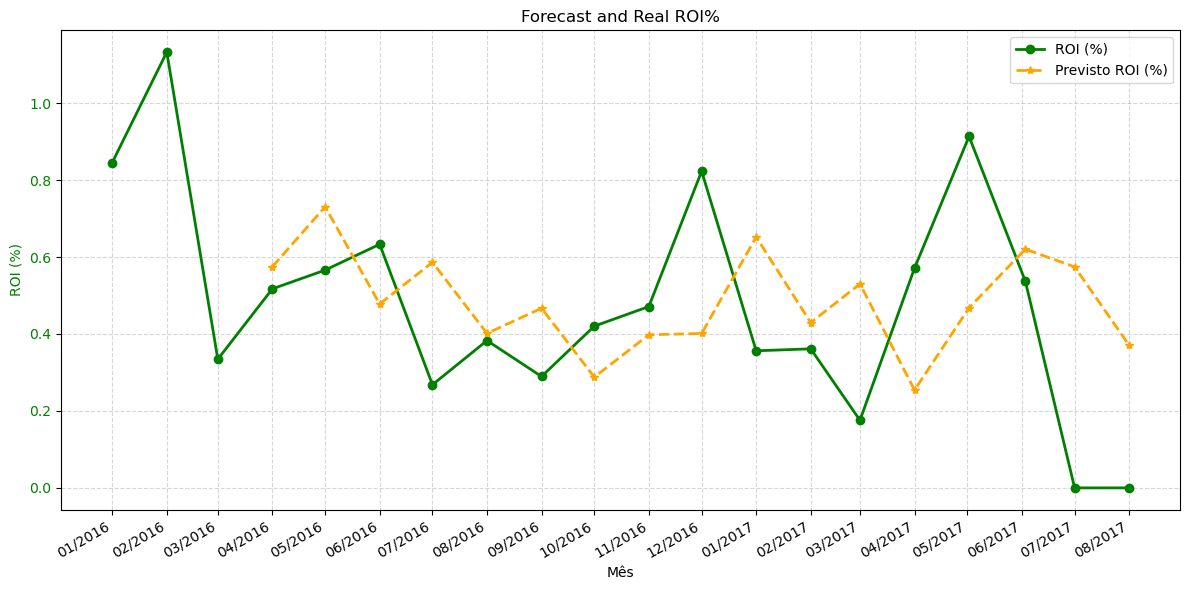

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.45 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.08 p.p    
    


tipo      Month  investimento        leads    ROI(%)  ROI previsto%  \
0    2016-01-01  2.704421e+05  2287.000000  0.845652            NaN   
1    2016-02-01  2.308607e+05  2615.000000  1.132717            NaN   
2    2016-03-01  7.544001e+05  2523.000000  0.334438            NaN   
3    2016-04-01  6.815992e+05  3526.000000  0.517313       0.574845   
4    2016-05-01  6.347326e+05  3593.000000  0.566065       0.730667   
5    2016-06-01  7.838748e+05  4964.000000  0.633264       0.477945   
6    2016-07-01  7.495170e+05  2010.000000  0.268173       0.586306   
7    2016-08-01  6.581322e+05  2520.000000  0.382902       0.401608   
8    2016-09-01  7.863641e+05  2277.000000  0.289561       0.467019   
9    2016-10-01  5.956009e+05  2504.000000  0.420416       0.287929   
10   2016-11-01  3.445337e+05  1624.000000  0.471362       0.397969   
11   2016-12-01  3.290729e+05  2708.833333  0.823171       0.401354   
12   2017-01-01  7.650553e+05  2726.000000  0.356314       0.652192   
13   2017-02-01  9.273575e+05  3352.000000  0.361457       0.429512   
14   2017-03-01  1.084284e+06  1905.000000  0.175692       0.530309   
15   2017-04-01  4.463012e+05  2549.000000  0.571139       0.254231   
16   2017-05-02  4.187500e+05  3826.000000  0.913672       0.468010   
17   2017-06-03  4.187500e+05  2249.000000  0.537075       0.620468   
18   2017-07-01           NaN          NaN  0.000000       0.574596   
19   2017-08-01           NaN          NaN  0.000000       0.370520   

tipo  Erro Absoluto(%)  Erro Absoluto  Erro Quadrático  
0                  NaN            NaN              NaN  
1                  NaN            NaN              NaN  
2                  NaN            NaN              NaN  
3             0.057532       0.000575     3.309972e-07  
4             0.164602       0.001646     2.709393e-06  
5             0.155320       0.001553     2.412421e-06  
6             0.318134       0.003181     1.012091e-05  
7             0.018706       0.000187     3.499186e-08  
8             0.177458       0.001775     3.149137e-06  
9             0.132487       0.001325     1.755277e-06  
10            0.073393       0.000734     5.386510e-07  
11            0.421817       0.004218     1.779298e-05  
12            0.295878       0.002959     8.754393e-06  
13            0.068055       0.000681     4.631504e-07  
14            0.354617       0.003546     1.257532e-05  
15            0.316908       0.003169     1.004305e-05  
16            0.445662       0.004457     1.986143e-05  
17            0.083393       0.000834     6.954388e-07  
18            0.574596       0.005746     3.301603e-05  
19            0.370520       0.003705     1.372852e-05

In [32]:
del df_MMPonderada
# pesos
pesos_print = f"""Pesos

w1= {w1},
w2= {w2},
w3= {w3},

soma dos pesos {w1+w2+w3}
"""
print(pesos_print)

df_copy['ROI previsto%']  = calcular_roi_previsto(df_copy['ROI(%)'])
df_copy = calculo_erros(df_copy)
display(df_copy)

Outras opções não lineares em scipy.optimize.minimize incluem:

Método   |	 Suporta restrições?	|Descrição resumida

SLSQP    |✅ Sim	               |Mais comum para problemas com restrições de igualdade/limites. Muito usado como equivalente ao Solver do Excel.

trust-constr|✅ Sim	              |Algoritmo robusto e moderno. Pode ser melhor para problemas maiores, mas mais lento.

COBYLA	    |✅ Sim (apenas de desigualdade)	|Útil em problemas sem derivadas e com restrições simples.

Powell	    |❌ Não	                 |Não aceita restrições — evita se você precisa de pesos que somem 1.

L-BFGS-B    |	❌                  |Apenas limites	Mais usado em problemas sem restrições de igualdade.

TNC, CG, BFGS, Newton-CG|	❌    |ou parcial	Otimizadores mais gerais, sem suporte direto a restrições de igualdade.

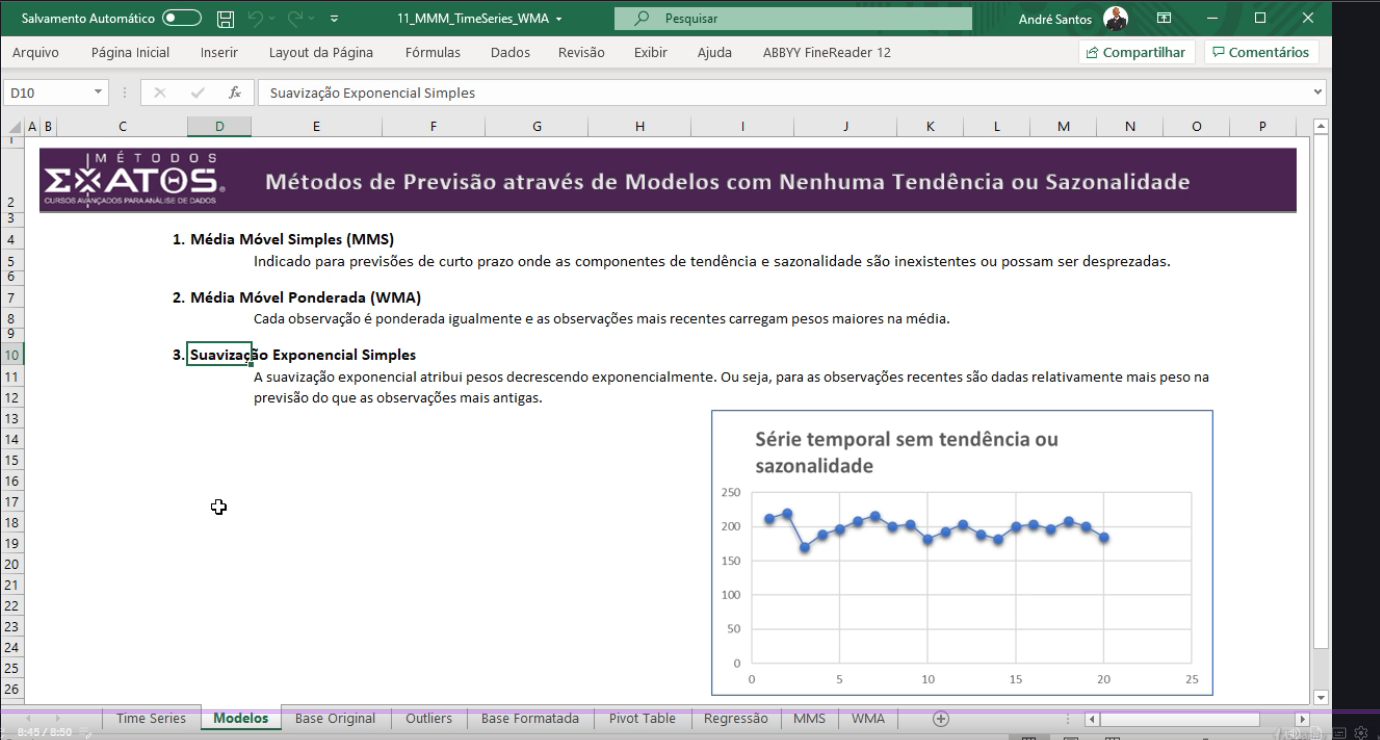

# Para achar o melhor parâmetro, usar no excel o solver. Dados → solver

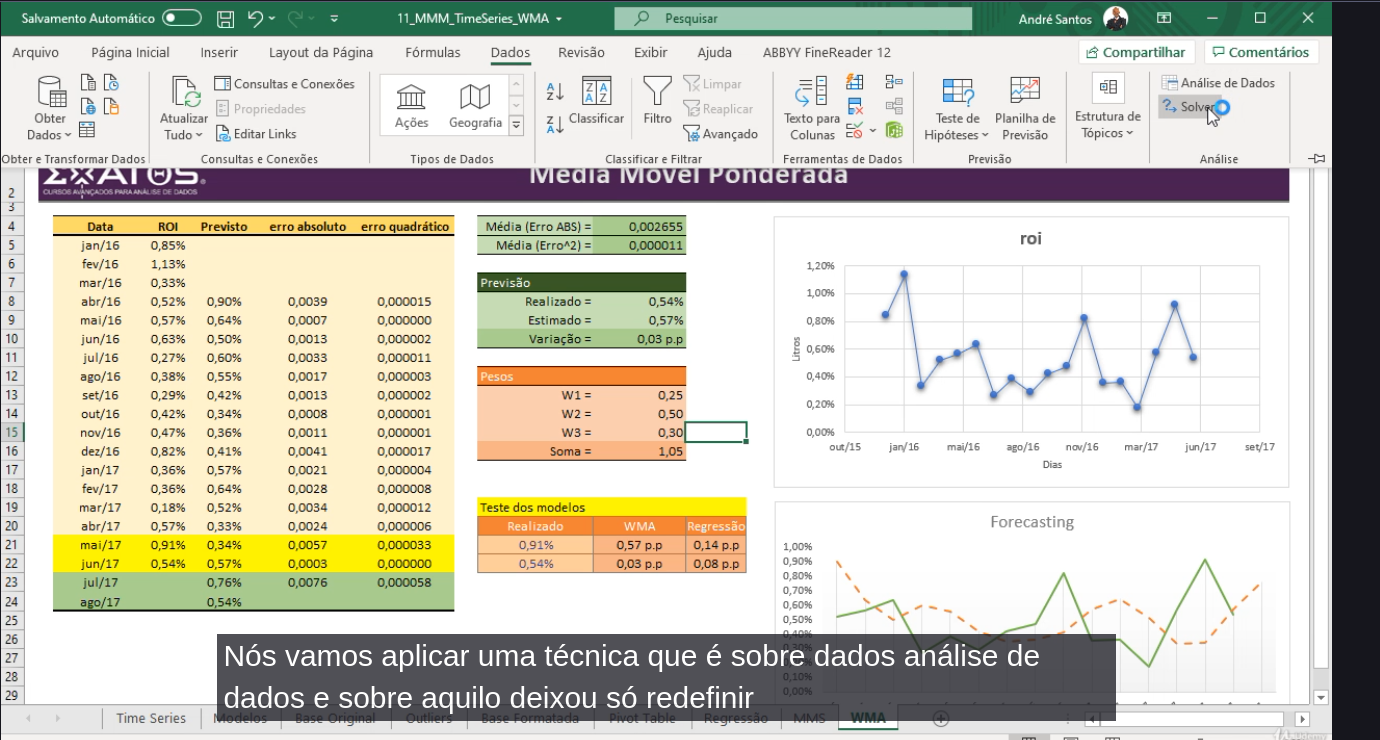

redefinir tudo

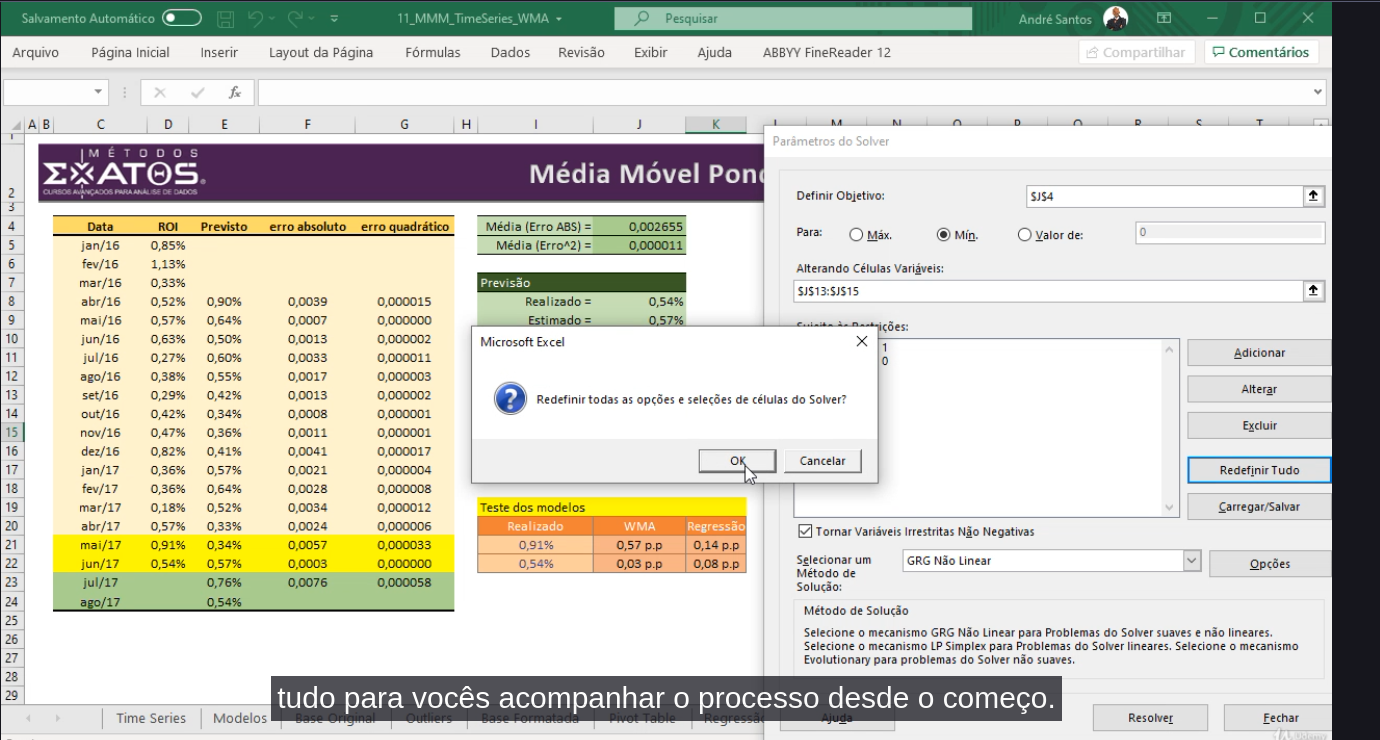

objetivo, minimizar o erro, que é o Erro ABS


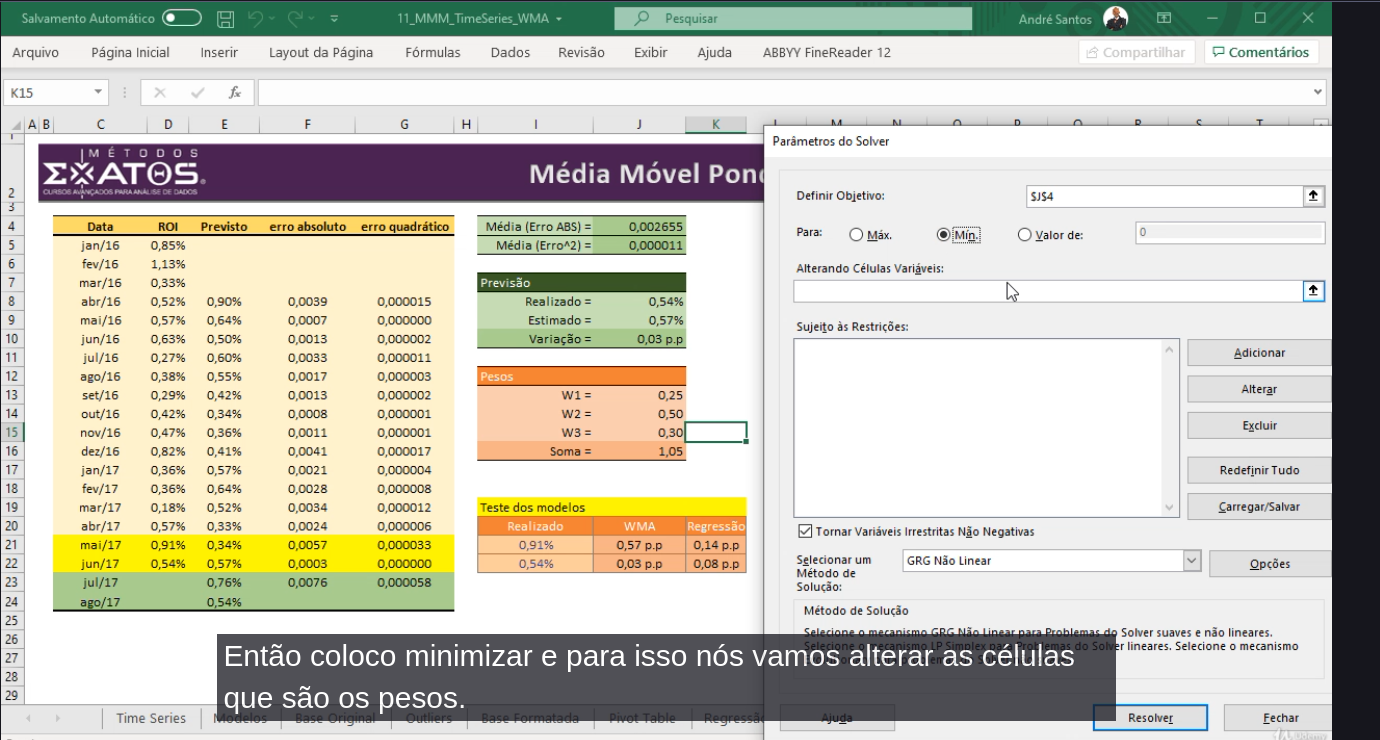


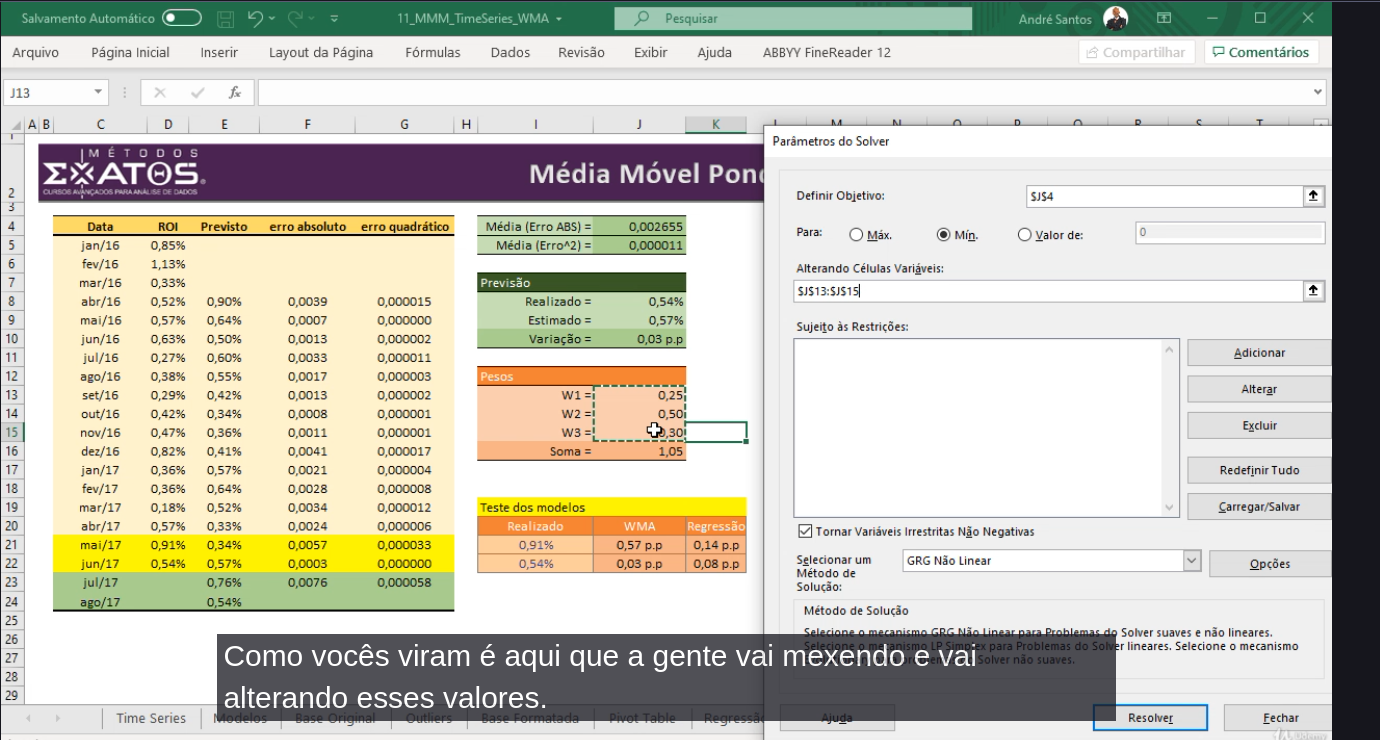


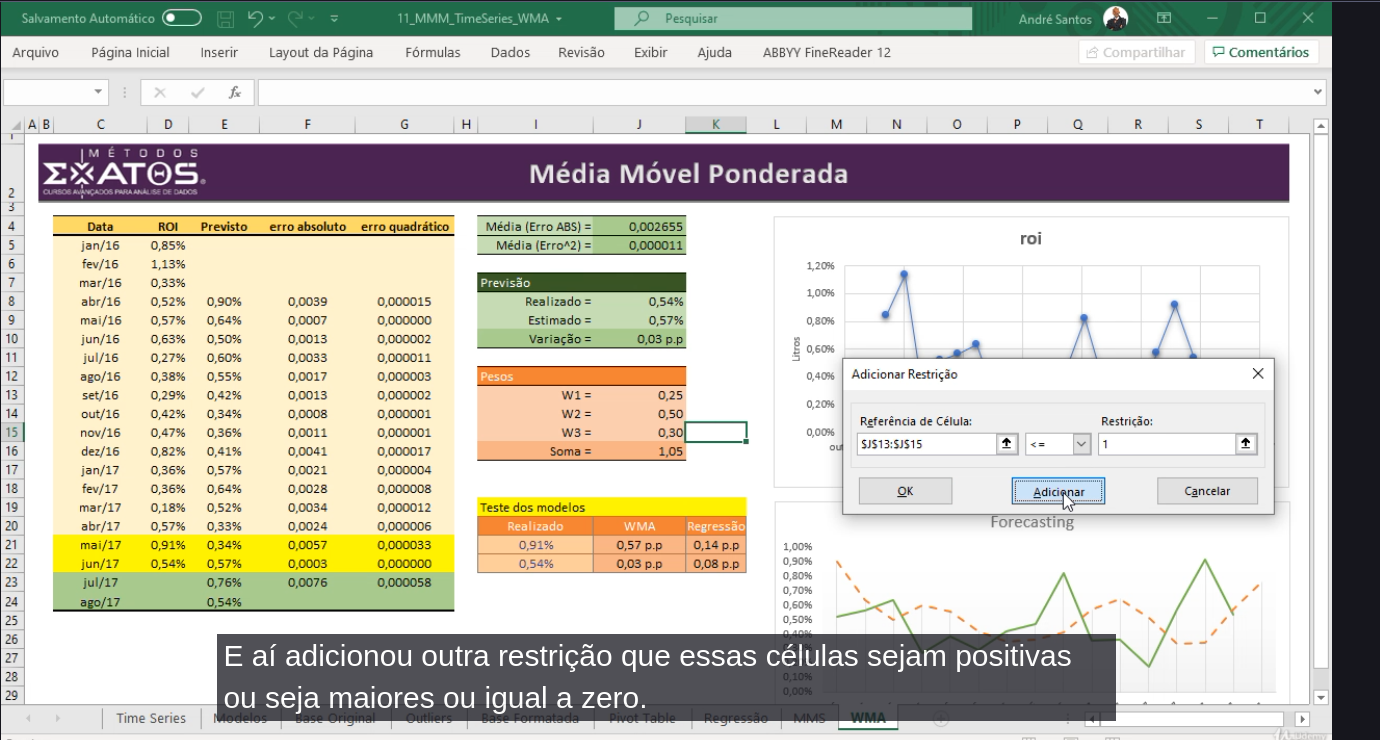


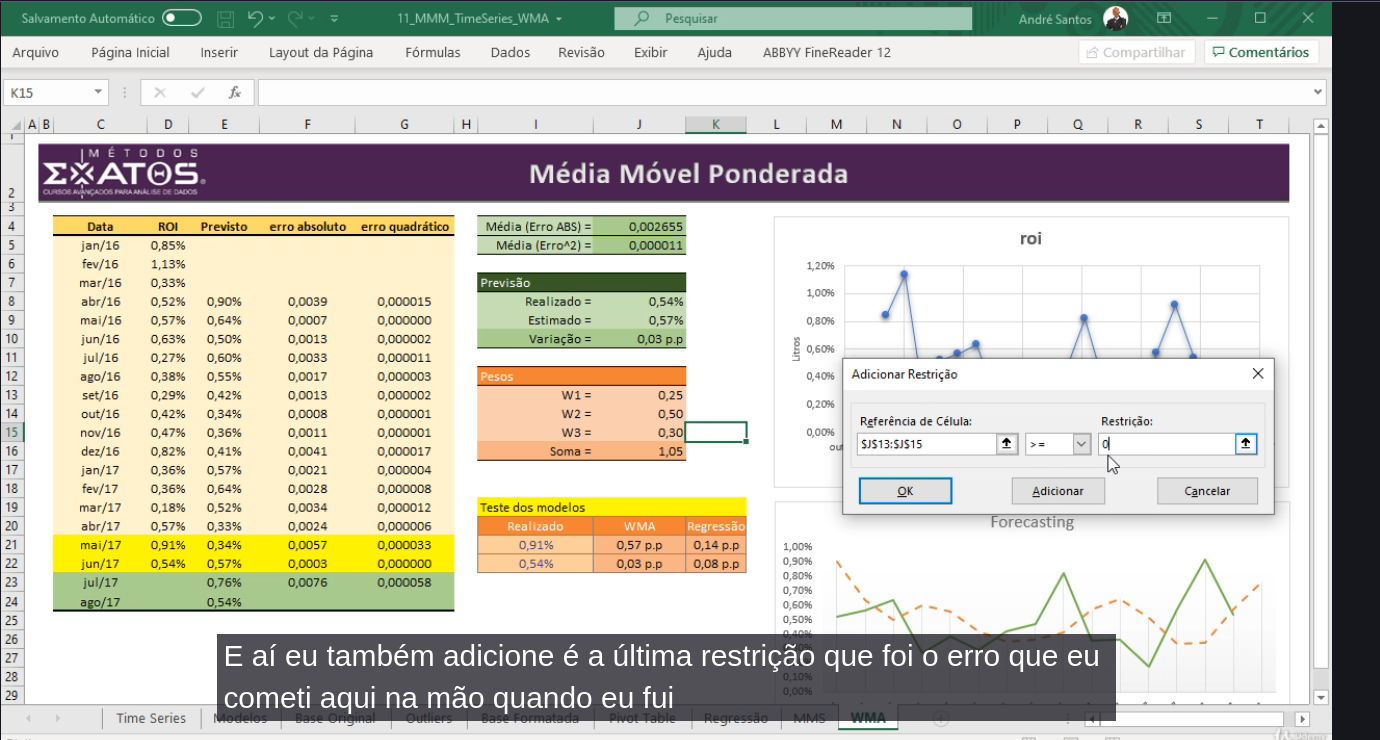


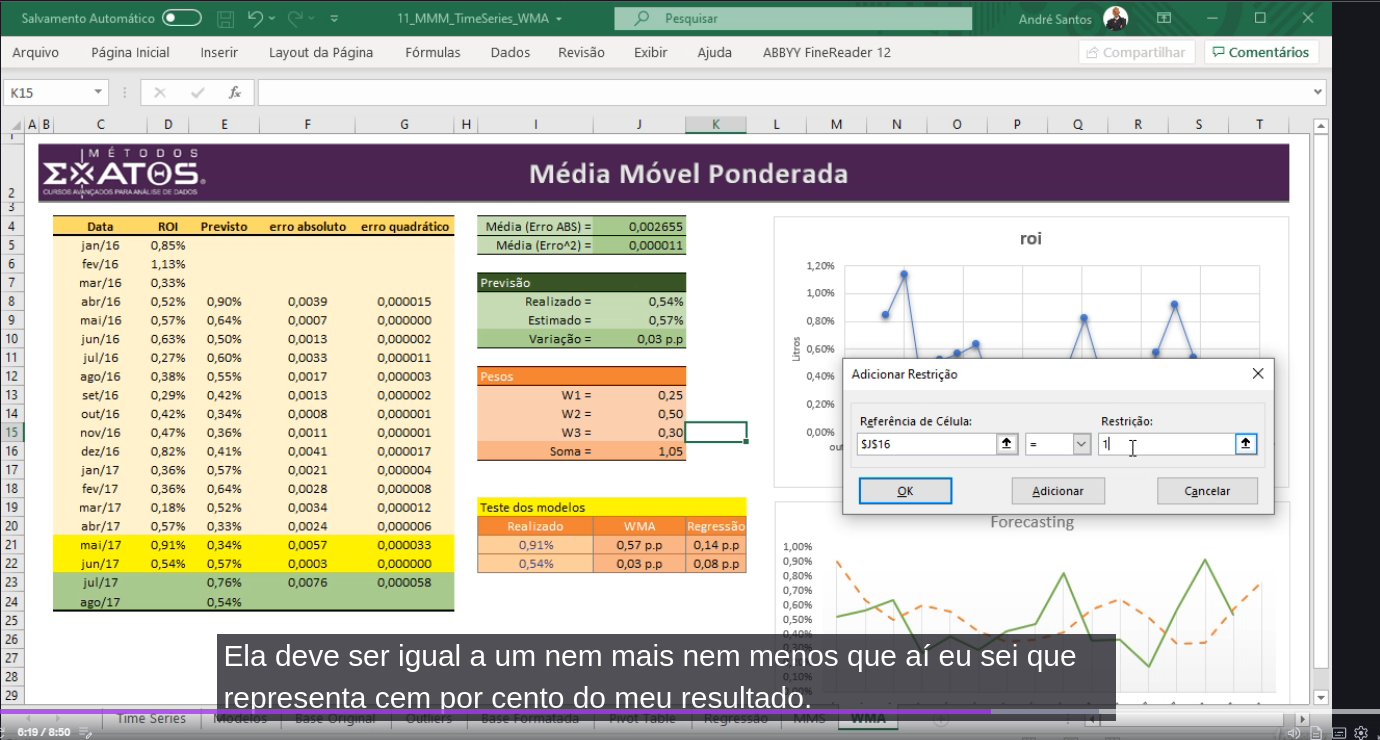


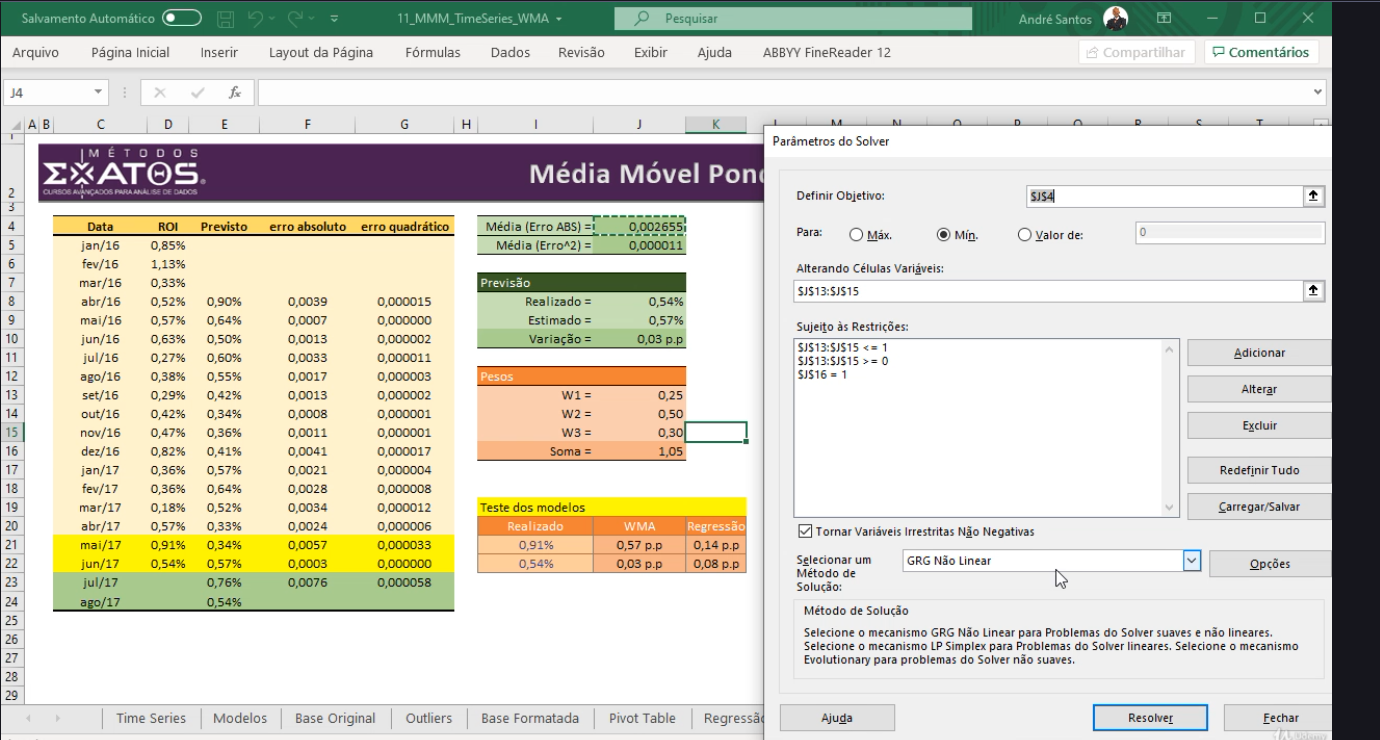

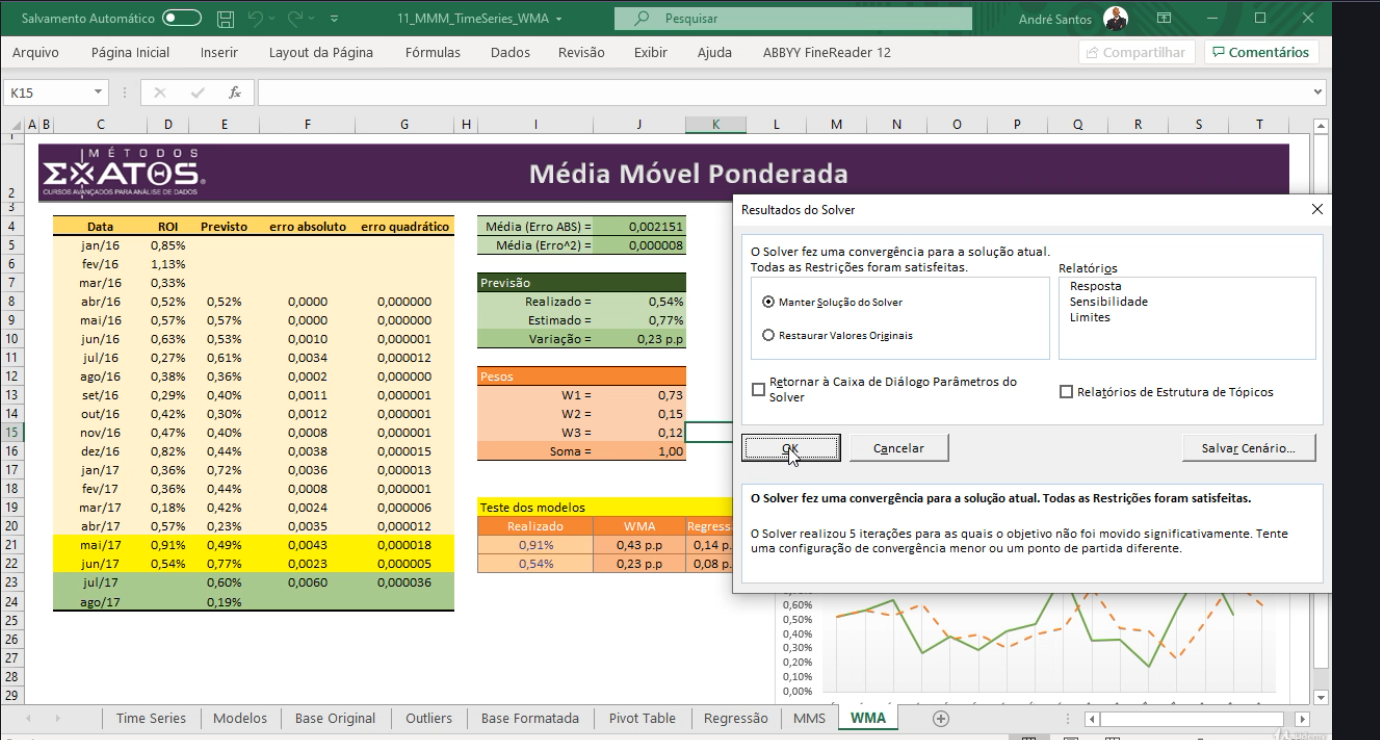


- Erro em despresar a sazonalidade e a tendência

- erro de trocar a base como média, técnica não apropriada
